# Spectrophores

## Introduction

Spectrophores are one-dimensional descriptors generated from the property
fields surrounding molecules. The technology allows the accurate 
description of molecules in terms of their surface properties or fields. 
Comparison of molecules’ property fields provides a robust structure-
independent method of aligning actives from different chemical classes. When 
applied to molecules such as ligands and drugs, spectrophores can be used as 
powerful molecular descriptors in the fields of chemoinformatics, virtual 
screening, and QSAR modeling.

The computation of spectrophores is independent of the position and orientation
of the molecule and this enables easy and fast comparison of spectrophores
between different molecules. Molecules having similar three-dimensional 
properties and shapes always yield similar Spectrophores.

## Technical background

A spectrophore is calculated by surrounding the three-dimensional conformation 
of the molecule by a three-dimensional arrangement of points, followed by 
calculating the interaction between each of the atom properties and the 
surrounding the points. The three-dimensional arrangement of the points
surrounding the molecule can be regarded as an ‘artificial’ cage or receptor,
and the interaction calculated between the molecule and the cage can be 
regarded as an artificial representation of an affinity value between molecule 
and cage:

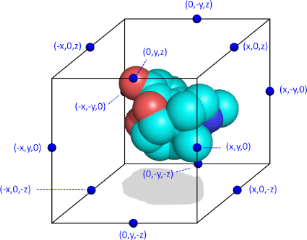

In [2]:
from IPython.display import Image
Image(filename='spectrophore_cage.png', width=340)

Schematic representation of a molecule surrounded by the artifical cage

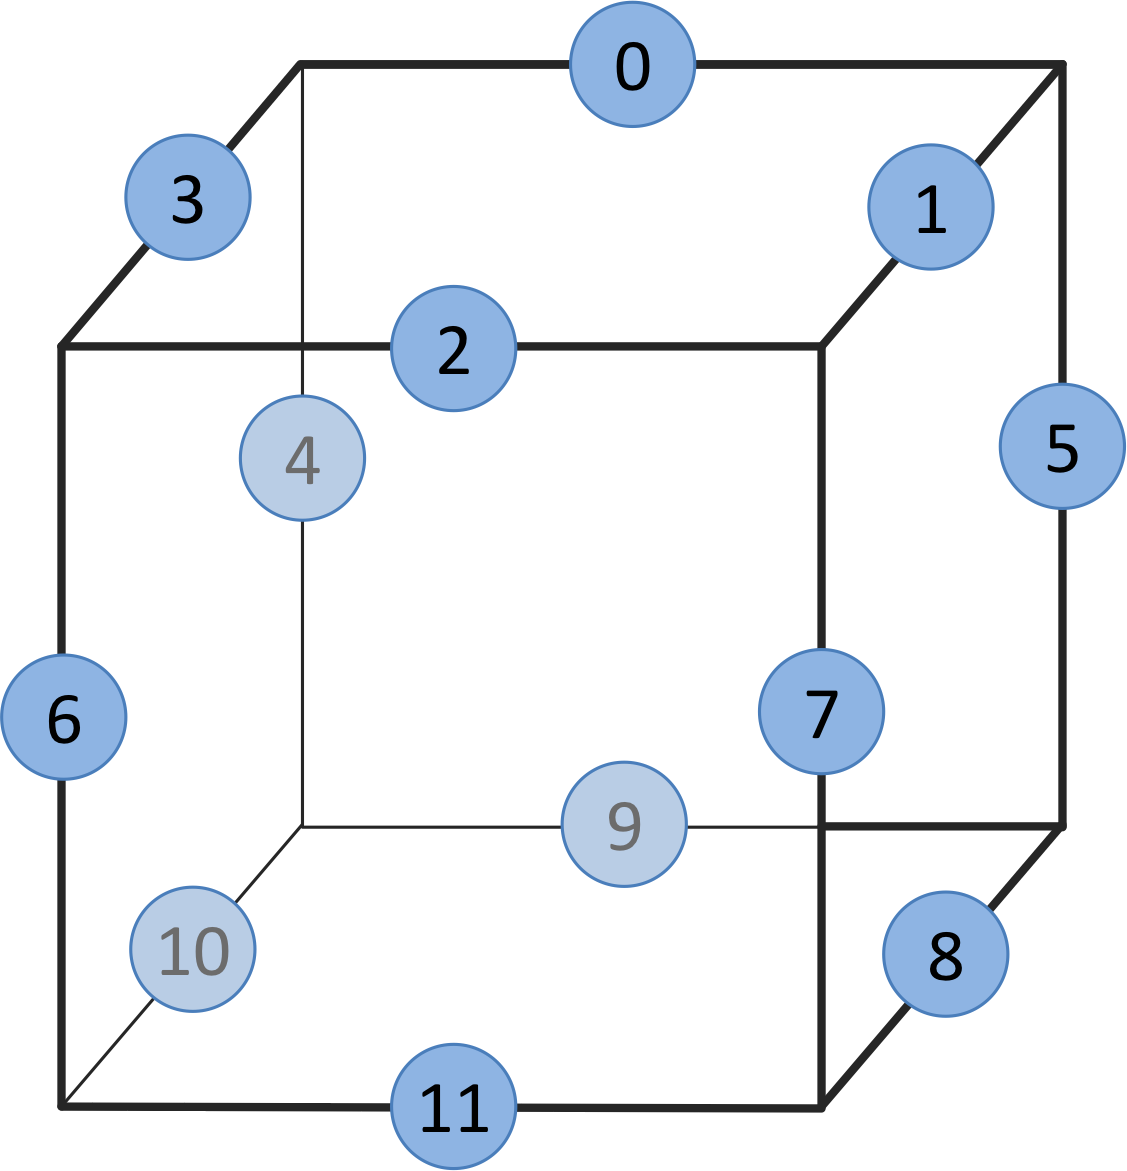

In [3]:
from IPython.display import Image
Image(filename='spectrophore_cage_numbering.png', width= 340)

   Numbering of the cage interaction points


Because the calculated interaction is dependent on the relative 
orientation of the molecule within the cage, the molecule is rotated in 
discrete angles and the most favorable interaction value is kept as final 
result. The angular stepsize at which the molecule is rotated along its three 
axis can be specified by the user and influences the accuracy of the method.

The calculation of a spectrophore starts by calculating the atomic 
contributions of each property from which one wants to calculate a spectrophore 
from. In the current implementation, four atomic properties are converted into 
a Spectrophore; these four properties include:

* the atomic partial charges,
* the atomic lipohilicities, 
* the atomic shape deviations, and 
* the atomic electrophilicities.

## Atomic properties

The atomic partial charges and atomic electrophilicity properties are 
calculated using the electronegativity equalisation method (EEM) as described 
by Bultinck and coworkers ([#f1]_, [#f2]_). The following table lists the
atomic electronegativity and hardness parameters that are used in the EEM 
method as implemented in the current spectrophore code:

 <table style="width:50%">
  <tr> <th>atom</th> <th>Atomic electronegativity</th> <th>Atomic hardness </th> </tr>
  <tr> <td>H</td> <td> 0.20606</td> <td>0.65971</td> </tr>
  <tr> <td>C</td> <td>0.36237</td> <td>0.32966</td> </tr>
  <tr> <td>N</td> <td> 0.49279</td> <td>0.34519</td> </tr>
  <tr> <td>O</td> <td>0.73013</td> <td>0.54428</td> </tr>
  <tr> <td>F</td> <td>0.72052</td> <td>0.72664</td> </tr>
  <tr> <td>S</td> <td>0.62020</td> <td>0.20640</td> </tr>
  <tr> <td>Cl</td> <td>0.36237</td> <td>0.32966</td> </tr>
  <tr> <td>Br</td> <td>0.70052</td> <td>0.54554</td> </tr>
  <tr> <td>I</td> <td>0.68052</td> <td>0.30664</td> </tr>
  <tr> <td>*</td> <td>0.36237</td> <td>0.32966</td> </tr>
</table> 


Atomic lipophilic potential parameters are calculated using a rule-based method
using parameters from the following table. These parameters were obtained by
fitting against the logP values of 10,881 molecules:


 <table style="width:50%">
  <tr> <th>atom</th> <th>Lipophilicity parameter</th> </tr>
  <tr> <td> H bound to C </td>        <td> -0.018</td> </tr>
  <tr> <td>H bound to heteroatom</td> <td> -0.374</td> </tr>
  <tr> <td>C</td>                     <td> +0.271</td> </tr>
  <tr> <td>N</td>                     <td> -0.137</td> </tr>
  <tr> <td>O</td>                     <td> -0.321</td> </tr>
  <tr> <td>F</td>                     <td> +0.217</td> </tr>
  <tr> <td>S</td>                     <td> +0.385</td> </tr>
  <tr> <td>Cl</td>                    <td> +0.632</td> </tr>
  <tr> <td>Br</td>                    <td> +0.815</td> </tr>
  <tr> <td>I</td>                     <td> +0.198</td> </tr>
  <tr> <td>*</td>                     <td> -0.175</td> </tr>
</table> 



Finally, the atomic shape deviation is generated by calculating, for each atom,
the atom’s deviation from the average molecular radius. This is done in a
four steps process:

* The molecular center of geometry (COG) is calculated;
* The distances between each atom and the molecular COG are calculated;
* The average molecular radius is calculated by averaging all the atomic
  distances.
* The distances between each atom and the COG are then divided by the average
  molecular radius and centered on zero.


## Interactions between atoms and cage points

Following the calculation of all required atomic properties, the next step in
the calculation of a spectrophore consists of determining the total
interaction value *V(c,p)* between each of the atomic contributions of
property *p* with a set of interaction points on an artificial cage
*c* that surrounds the molecular conformation. For this purpose, each of the
interaction points *i* on cage *c* is assigned a value *P(c,i)*
which is either +1 or -1, with the constraint that the sum of all interaction
points on a particular cage should be zero. In a typical spectrophore
calculation, a cage is represented as a rectangular box encompassing the
molecular conformation in all three dimensions, with the centers of the box
edges being the interaction points. Such a configuration gives twelve
interaction points per cage, and, in the case of a non-stereospecific
distribution of the interaction points, leads to 12 different cages. Although
there are no particular requirements as to the dimensions of the rectangular
cage, the distance between the interaction points and the geometrical extremes
of the molecule should be such that a meaningful interaction value between each
cage point and the molecular entity can be calculated. In this respect, the
default dimensions of the cage are constantly adjusted to enclose the molecule
at a minimum distance of 3 Angstrom along all dimensions. This cage size can be
modified by the user and influences the resolution of the Spectrophore.
   
The total interaction value *V(c,p)* between the atomic contribution values
*A(j,p)* of property *p* for a given molecular conformation and the cage 
interaction values *P(c,i)* for a given cage *c* is calculated according a 
standard interaction energy equation. It takes into account the euclidean 
distance between each atom and each cage point. This total interaction *V(c,p)* 
for a given property *p* and cage *c* for a given molecular conformation is 
minimized by sampling the molecular orientation along the three axis in angular 
steps and the calculation of the interaction value for each orientation within 
the cage. The final total interaction *V(c,p)* for a given cage *c* and 
property *p* corresponds to the lowest interaction value obtained this way, and 
corresponds to the *c*’th value in the one-dimensional spectrophore vector 
calculated for molecular property *p*. As a result, a spectrophore is organized 
as a vector of minimized interaction values *V*, each of these organized in 
order of cages and property values. Since for a typical Spectrophore 
implementation twelve different cages are used, the total length of a 
spectrophore vector equals to 12 times the number of properties. Since four 
different properties are used in the current implementation (electrostatic, 
lipophilic, electrophilic potentials, and an additional shape index as 
described before), this leads to a total spectrophore length of 48 real values 
per molecular conformation::

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from spectrophores.spectrophore import spectrophoreCalculator

calculator = spectrophoreCalculator()
smi = 'c1ccccc1C(=O)NCC(O)CCC2CCNCC2'
mol = Chem.MolFromSmiles(smi)
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
calculator.calculate(mol)

array([   2.5655263 ,    2.28475952,    2.84996724,    4.72538816,
          6.28479756,    6.57766518,    4.59419129,    4.71051537,
          5.79372518,    7.31563967,    8.28540171,    5.89696465,
          6.86670776,   13.41318097,   12.29875105,   13.5203733 ,
         15.06035881,   15.94393402,   11.69605632,   17.39791904,
         20.40465124,   18.94502385,   20.00455189,   17.13567488,
         97.32301997,  168.21742159,  220.09204447,  277.8535162 ,
        156.01049281,  224.49074263,  121.13780233,  220.70279079,
        202.59570579,  187.84390262,  223.46110318,  300.0496901 ,
          1.93281041,    3.22564772,    4.29053843,    4.35139568,
          2.17392351,    2.38966845,    1.008368  ,    4.63356094,
          4.69928105,    2.55479382,    1.76372081,    3.28270916])

In [4]:
AllChem.MMFFOptimizeMolecule(mol)

1

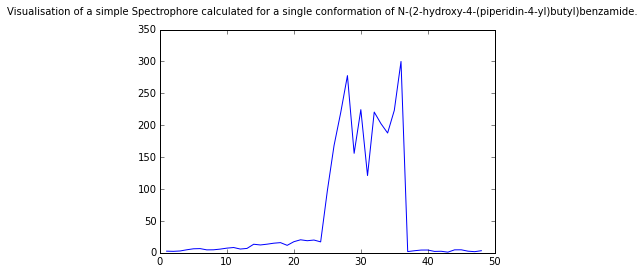

In [6]:
spc = calculator.calculate(mol)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,49), spc)
plt.suptitle("Visualisation of a simple Spectrophore calculated for a single conformation of \
N-(2-hydroxy-4-(piperidin-4-yl)butyl)benzamide.")


Comparison the corresponding box values for all of the four properties is done
as follows:

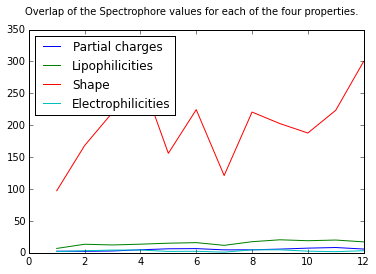

In [7]:
plt.plot(range(1,13), spc[0:12], label='Partial charges')
plt.plot(range(1,13), spc[12:24], label='Lipophilicities')
plt.plot(range(1,13), spc[24:36], label='Shape')
plt.plot(range(1,13), spc[36:48], label='Electrophilicities')
plt.legend(loc = 'upper left')
plt.suptitle("Overlap of the Spectrophore values for each of the four properties.")

Since spectrophore descriptors are dependent on the actual three-dimensional 
conformation of the molecule, a typical analysis includes the calculation of 
spectrophores from a reasonable set of different conformations. It is then up 
to the user to decide on the most optimal strategy for processing the different 
spectrophore vectors. In a typical virtual screening application, calculating 
the average spectrophore vector from all conformations of a single molecule may 
be a good strategy; other applications have benefit from calculating a weighted 
average or by taking the minimal values alone.

## Usage

Calculating a spectrophore from a molecule only requires the following basic 
steps:

In [7]:
from spectrophores.spectrophore import spectrophoreCalculator

calculator = spectrophoreCalculator()
spectrophore = calculator.calculate(mol)
print spectrophore

[   2.13177031    2.06136414    2.30757283    4.0692804     5.67844186
    5.14626232    4.90294493    4.96837337    4.4907571     5.72111211
    6.43068053    4.28896405    7.71553414   14.17293027   12.00897024
   12.15831177   14.45602391   14.88635364   10.18631573   16.00358859
   18.34273439   15.53404648   17.42731661   15.3047257   101.39853086
  170.84410304  230.24173342  268.97504139  179.440301    223.84870166
  130.76400387  244.92910424  230.6648171   194.44131205  232.3772088
  302.20728878    2.10440405    3.4633993     4.31541492    4.19397919
    2.79530488    2.86730106    1.33301627    4.86430367    4.95464373
    3.19847996    2.45590439    3.68168949]


Since the calculation of spectrophores requires atomic coordinates to be
present, these need to be added in advance. Hence a more realistic example is 
given here:

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
from spectrophores.spectrophore import spectrophoreCalculator

calculator = spectrophoreCalculator()
mol = Chem.MolFromSmiles('c1ncccc1C(=O)O')
mol = Chem.AddHs(mol)
cids = AllChem.EmbedMultipleConfs(mol, numConfs=3)
for cid in cids: _ = AllChem.MMFFOptimizeMolecule(mol,confId=cid)
for cid in cids: print calculator.calculate(mol, cid)

[  3.28551823   2.85208404   3.25335808   5.03849706   8.14755974
   7.01145885   5.71868863   7.09801051   8.19585719  10.43061392
  11.29710157   7.41116221   3.64705405   2.82516876   5.72791682
   8.06562571  16.57329001  14.8205917   11.68797081  15.82460935
  15.22009715  21.08323659  23.19786264  13.49140885  16.89463084
  26.26783796  23.89680555  19.69685959  21.46769398  15.23623021
   9.39399385  23.90496394  17.73381289  20.09711037  13.34705854
  25.48352736   1.13979939   1.24865378   3.77232978   3.80847054
   1.95054091   1.88664364   1.05929553   3.84086685   3.18041832
   2.33752856   2.36894603   3.39321307]
[  2.32201156   2.08283328   2.5001816    5.86563293   9.087762
   8.89768278   7.18314403   7.38595091   8.33660655  11.18619692
  12.57688678   7.43233567   3.76355176   2.77073726   5.69982614
   7.95101096  16.65428974  15.60473294  11.38814107  15.50972898
  14.93069851  19.42459479  22.18917056  13.17896599  16.02141752
  24.71489508  22.13036615  18.527352

which, when plotted, shows how similar the spectrophores are:

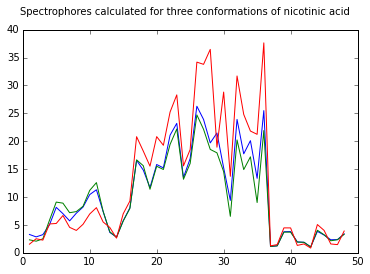

In [9]:
spectrophores = []
for cid in cids: spectrophores.append( calculator.calculate(mol, cid))
plt.plot(range(1,49), spectrophores[0], label='Conf 1')
plt.plot(range(1,49), spectrophores[1], label='Conf 2')
plt.plot(range(1,49), spectrophores[2], label='Conf 3')
plt.suptitle("Spectrophores calculated for three conformations of nicotinic acid")

## Accuracy

As already mentioned, the total interaction between a cage and molecule for a
given property is minimized by sampling the molecular orientation in angular
steps of a certain magnitude. As a typical angular step size, 30 degrees was 
found to be the best compromise between accuracy and computer speed. Larger 
steps sizes are faster to calculate but have the risk of missing the global 
interaction energy minimum, while smaller angular steps sizes do sample the 
rotational space more thoroughly but at a significant computational cost. The 
accuracy can be specified by the user using the 'setAccuracy()' method:

In [ ]:
import time
s = list()
t = list()
accuracy = (60,45,36,30,20,15,10,5,2,1)
for a in accuracy:
    calculator.setAccuracy(a)
    begin = time.time()
    s.append(calculator.calculate(mol))
    t.append(time.time() - begin)
    print a, time.time() - begin

60 0.0027768611908
45 0.00551986694336
36 0.00987792015076
30 0.0170569419861
20 0.0439479351044
15 0.0979061126709
10 0.286698102951


Valid argument values to the ``setAccuracy()`` call are ``60``, ``45``, 
``36``, ``30``, ``20``, ``15``, ``10``, ``5``, ``2`` and ``1``, with the
default value being ``30``. The use of other values will raise a 
``ValueError`` with message ``Accuracy should be 1, 2, 5, 10, 15, 20, 30, 36, 
45 or 60``.

In [ ]:
plt.plot(accuracy, t)
plt.suptitle('Execution time to calculate a Spectrophores of nicotinic acid at 10  different accuracies.')

  
Accuracies that are better than 15 are leading to extreme long execution times 
and are not leading to significant deviations in the calculated values compared
to faster accuracies: 
   

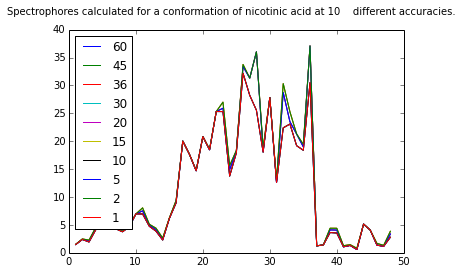

In [12]:
plt.plot(range(1,49), s[0], label='60')
plt.plot(range(1,49), s[1], label='45')
plt.plot(range(1,49), s[2], label='36')
plt.plot(range(1,49), s[0], label='30')
plt.plot(range(1,49), s[1], label='20')
plt.plot(range(1,49), s[2], label='15')
plt.plot(range(1,49), s[0], label='10')
plt.plot(range(1,49), s[1], label='5')
plt.plot(range(1,49), s[2], label='2')
plt.plot(range(1,49), s[0], label='1')
plt.legend(loc='upper left')
plt.suptitle("Spectrophores calculated for a conformation of nicotinic acid at 10 \
   different accuracies.")

## Normalisation

It may sometimes be desired to focus on the relative differences between the
spectrophore data points rather than focussing on the absolute differences.
In these cases, normalization of spectrophores may be required. The current
implementation offers with the ``setNormalization()`` method the possibility to 
normalize in four different ways:

* No normalization;
* Normalization towards zero mean;
* Normalization towards standard deviation;
* Normalization towards zero mean and unit standard deviation (default).

In all these cases, normalization is performed on a 'per-property' basis, which
means that the data points belonging to the same property set are treated as a
single set and that normalization is only performed on the data points within
each of these sets and not across all data points.

Normalization may be important when comparing the spectrophores of charged
molecules with those of neutral molecules. For molecules carrying a global
positive charge, the resulting spectrophore data points of the charge and
electrophilicity properties will both be shifted in absolute value compared to
the corresponding data points of the respective neutral species. Normalization
of the spectrophores removes the original magnitude differences for the data
points corresponding to the charge and electrophilicity properties of charged
and neutral species. Therefore, if the emphasis of the virtual screening
consists of the identification of molecules with similar property fields 
without taking into account differences in absolute charge, then Spectrophores
should be normalized towards zero mean. However, if absolute charge differences
should be taken into account to differentiate between molecules, unnormalized
Spectrophores are recommended.

Valid argument values to the ``setNormalization()`` method are ``none``, 
``mean``, ``std`` or  ``all``. The default value is ``all``. Values that are 
not listed will raise a ``ValueError`` with message ``The normalization flag  should be "none", "mean", "std" or "all"``.


## Resolution

Spectrophores capture information about the property fields surrounding the
molecule, and the amount of detail that needs to be captured can be regulated 
by the user. This is done by altering the minimal distance between the molecule 
and the surrounding cage. The resolution can be specified by the user with the
``setResolution()`` method. The default distance along all dimensions is 3.0 
Angstrom. The larger the distance, the lower the resolution. With a higher 
resolution, more details of the property fields surrounding the molecule are 
contained by the spectrophore. On the contrary, low resolution settings may 
lead to a more general representation of the property fields, with little or no 
emphasis on small local variations within the fields. Using a low resolution 
can be the method of choice during the initial virtual screening experiments in 
order to get an initial, but not so discriminative, first selection. This 
initial selection can then further be refined during subsequent virtual 
screening steps using a higher resolution. In this setting, small local 
differences in the fields between pairs of molecules will be picked up much 
more easily.

The absolute values of the individual spectrophore data points are dependent
on the used resolution. Low resolution values lead to small values of the
calculated individual spectrophore data points, while high resolutions will
lead to larger data values. It is therefore only meaningful to compare only
Spectrophores that have been generated using the same resolution settings or
after some kind of normalization is performed. Computation time is not 
influenced by the specified resolution:

In [13]:
s = list()
t = list()
calculator.setAccuracy(30)
calculator.setNormalization('none')
for r in range(1,20,2):
    calculator.setResolution(r)
    begin = time.time()
    s.append(calculator.calculate(mol))
    t.append(time.time() - begin)
    print r, time.time() - begin

1 0.0256199836731
3 0.0220048427582
5 0.0202090740204
7 0.0201861858368
9 0.0254559516907
11 0.0217499732971
13 0.0231471061707
15 0.0242052078247
17 0.0212180614471
19 0.0201721191406


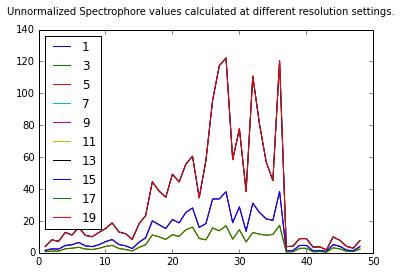

In [15]:
plt.plot(range(1,49), s[0], label='1')
plt.plot(range(1,49), s[1], label='3')
plt.plot(range(1,49), s[2], label='5')
plt.plot(range(1,49), s[0], label='7')
plt.plot(range(1,49), s[1], label='9')
plt.plot(range(1,49), s[2], label='11')
plt.plot(range(1,49), s[0], label='13')
plt.plot(range(1,49), s[1], label='15')
plt.plot(range(1,49), s[2], label='17')
plt.plot(range(1,49), s[0], label='19')
plt.legend(loc='upper left')

plt.suptitle("Unnormalized Spectrophore values calculated at different resolution settings.")

and when spectrophore normalization is applied:

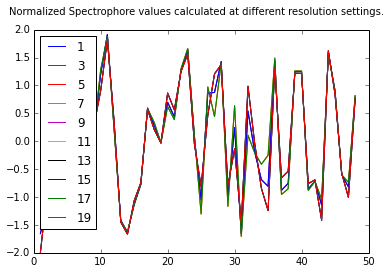

In [16]:
calculator.setNormalization('all')
s = list()
for r in range(1,20,2):
    calculator.setResolution(r)
    s.append(calculator.calculate(mol))
    
plt.plot(range(1,49), s[0], label='1')
plt.plot(range(1,49), s[1], label='3')
plt.plot(range(1,49), s[2], label='5')
plt.plot(range(1,49), s[0], label='7')
plt.plot(range(1,49), s[1], label='9')
plt.plot(range(1,49), s[2], label='11')
plt.plot(range(1,49), s[0], label='13')
plt.plot(range(1,49), s[1], label='15')
plt.plot(range(1,49), s[2], label='17')
plt.plot(range(1,49), s[0], label='19')
plt.legend(loc='upper left')

plt.suptitle("Normalized Spectrophore values calculated at different resolution settings.")

Valid argument values to the ``setResolution()`` method are all numbers that
are larger than ``0``. The default value is ``3``. Values equal to or smaller 
than zero will raise a ``ValueError`` with message ``Resolution should be larger than 0``.

## Stereospecificity

Some of the cages that are used to calculated spectrophores have a 
stereospecific distribution of the interaction points.

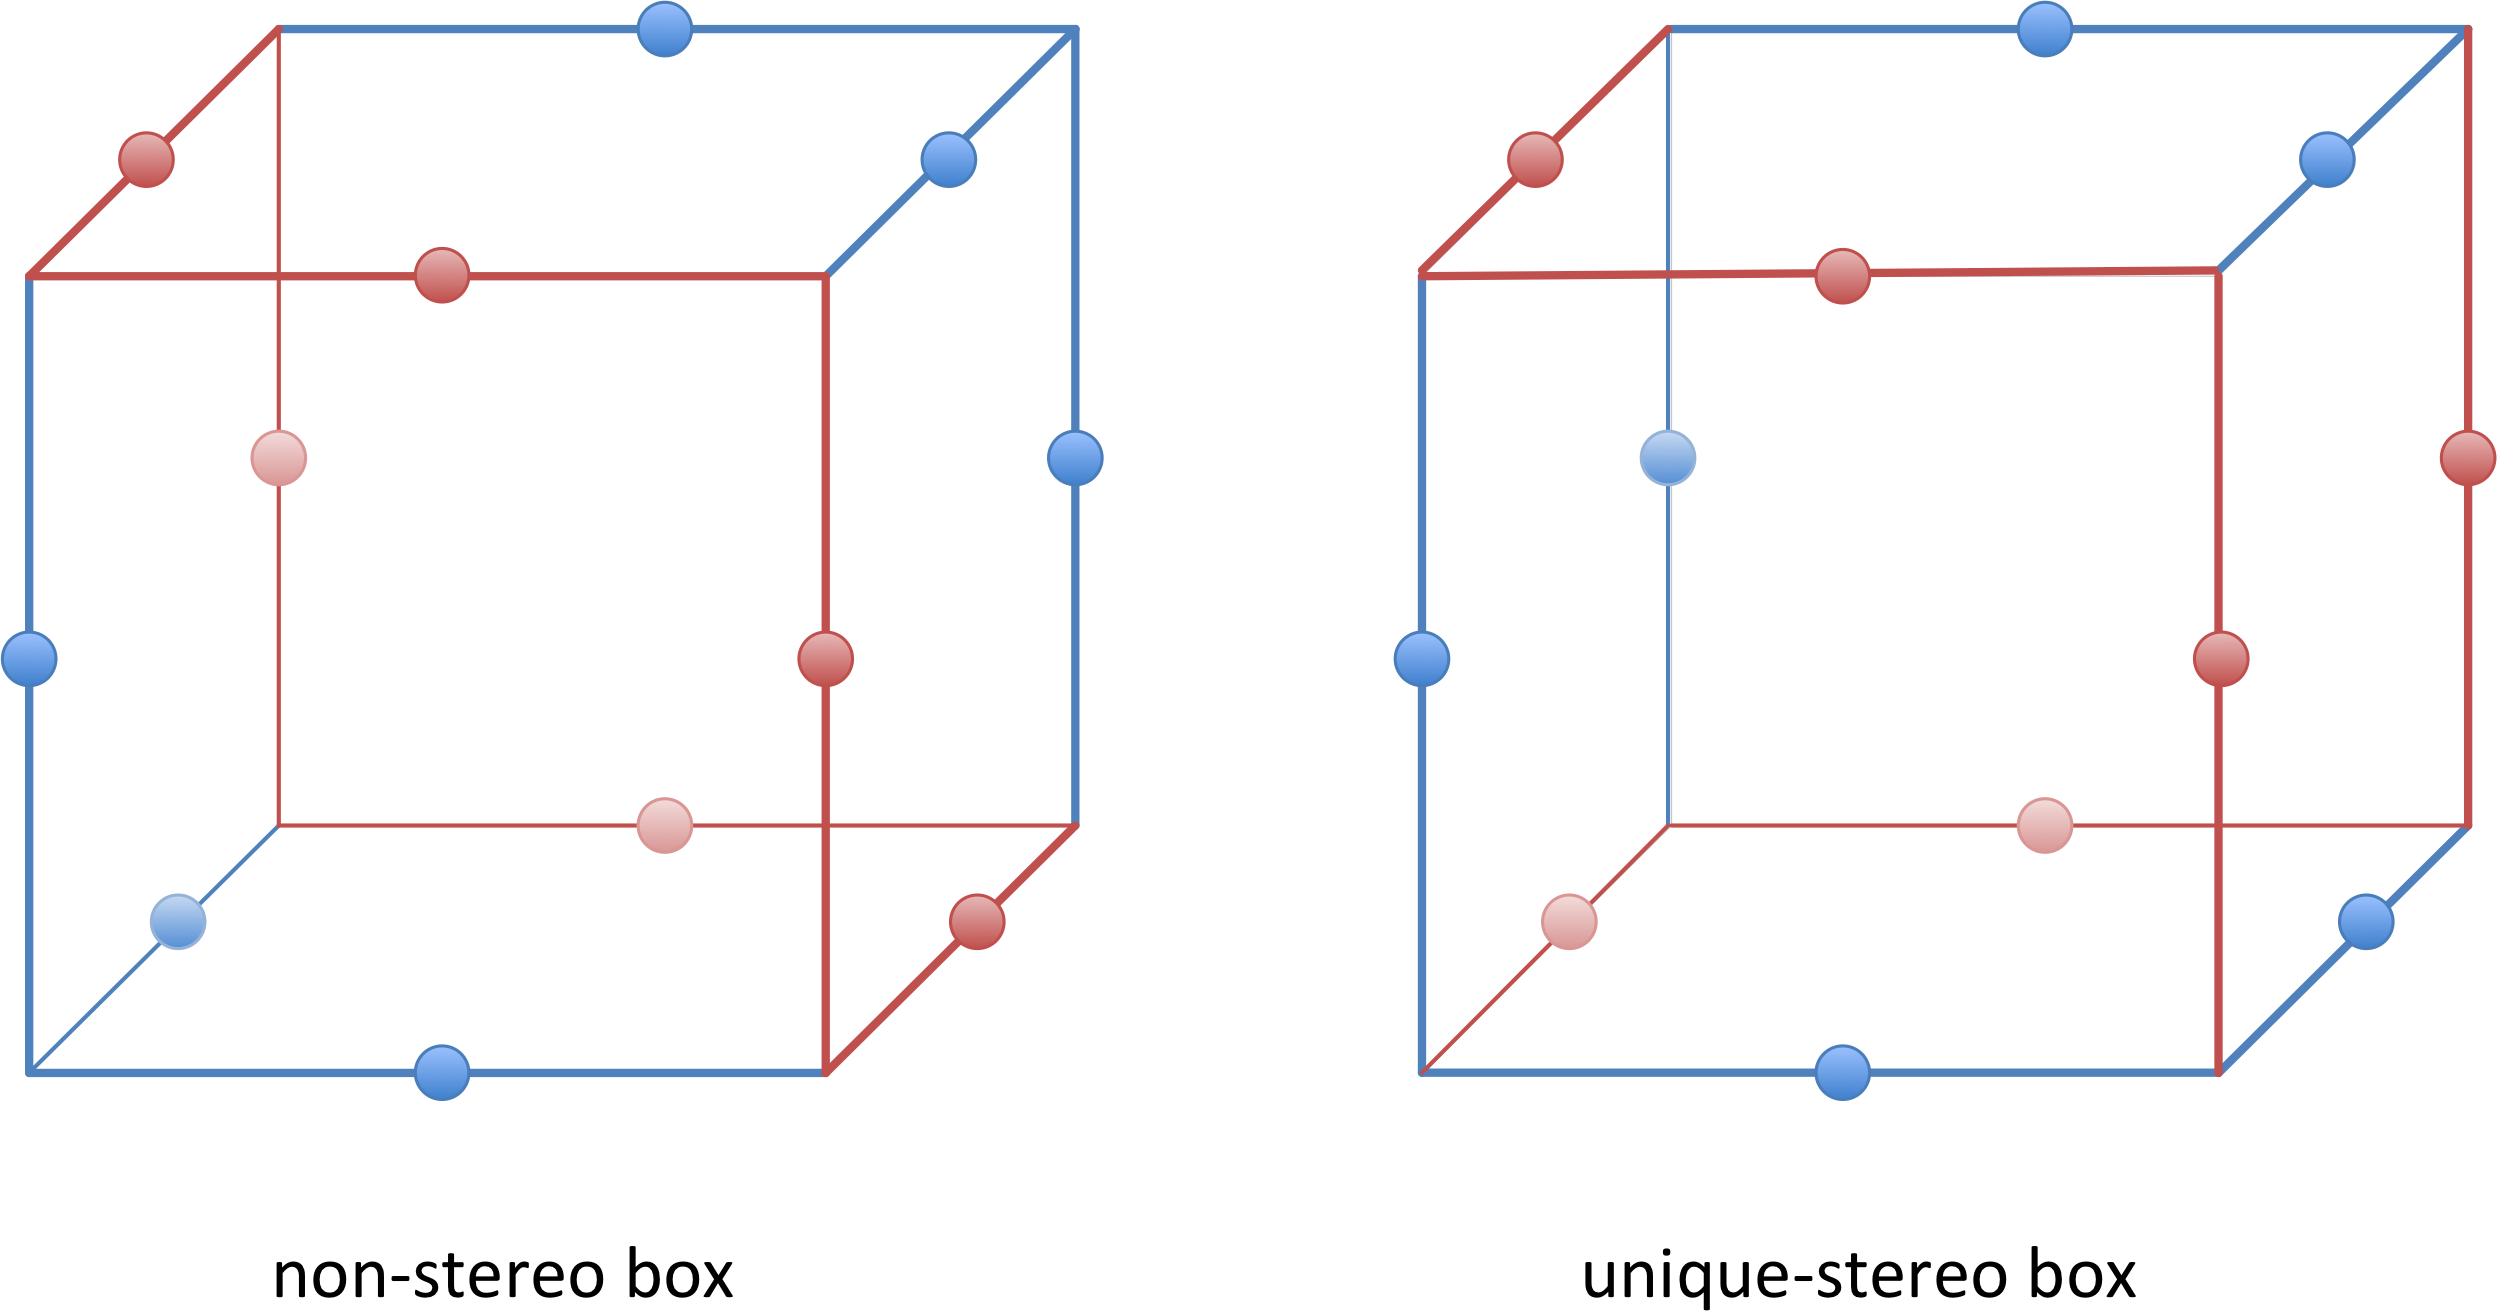

In [24]:
from IPython.display import Image
Image(filename='spectrophore_cage_stereo.png', width=340)

   Example of a non-stereo (left) and unique-stereo box (right). Blue points 
   denote interaction points with a +1 value, and red spheres are interaction 
   points with a -1 value.

The interaction values resulting from these cages are therefore sensitive to 
the enantiomeric configuration of the molecule within the cage. The fact that 
both stereoselective as well as stereo non-selective cages can be used makes it
possible to include or exclude stereospecificity in the virtual screening
search. Depending on the desired output, the stereospecificity of
Spectrophores can be specified by the user:

* No stereospecificity (default). Spectrophores are generated using cages that 
  are not stereospecific. For most applications, these spectrophores will 
  suffice.
* Unique stereospecificity. Spectrophores are generated using unique 
  stereospecific cages.
* Mirror stereospecificity. Mirror stereospecific spectrophores are
  spectrophores resulting from the mirror enantiomeric form of the input
  molecules.

The stereospecificity can be specified by the user using the ``setStereo()`` 
method. Valid argument values to the ``setStereo()`` method are ``none``, 
``unique``, ``mirror`` or  ``all``. The default is ``none``. The ``all`` 
argument denotes that all stereospecific probes should be used, hence both 
``unique`` and ``mirror``. Values that are not allowed will raise a 
``ValueError`` with message ``The stereo flag should be "none", "unique", 
"mirror" or "all"``. 

Stereospecific configurations of molecules, such as the **(R)**- and 
**(S)**-configurations of bromochlorofluoroiodomethane, yield identical 
spectrophores when using the cages that are not stereospecific (specified with
the ``setStereo('none')`` method::

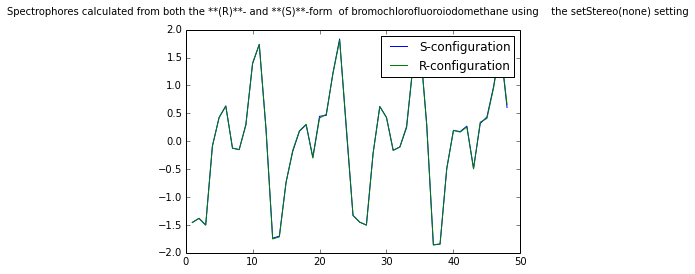

In [17]:
smi_r = 'Cl[C@@](I)(Br)F'
smi_s = 'F[C@@](I)(Br)Cl'
mol_s = Chem.MolFromSmiles(smi_s)
mol_r = Chem.MolFromSmiles(smi_r)
AllChem.EmbedMolecule(mol_s)
AllChem.MMFFOptimizeMolecule(mol_s)
AllChem.EmbedMolecule(mol_r)
AllChem.MMFFOptimizeMolecule(mol_r)
calculator.setStereo('none')
calculator.setAccuracy(20)
spc_s = calculator.calculate(mol_s)
spc_r = calculator.calculate(mol_r)
x = range(1,49)
plt.plot(x, spc_s, label='S-configuration')
plt.plot(x, spc_r, label='R-configuration')
plt.legend(loc='upper right')
plt.suptitle('Spectrophores calculated from both the **(R)**- and **(S)**-form  of bromochlorofluoroiodomethane using the ''setStereo(''none'')'' setting')          

However, differences in the spectrophores arise when stereospecific probes
are used in combination with a very high accuracy:

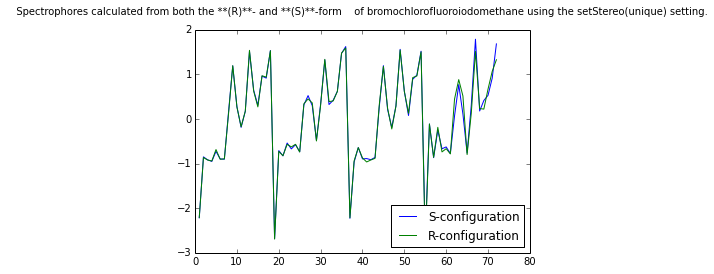

In [22]:
calculator.setStereo('unique')
calculator.setAccuracy(20)
calculator.setNormalization('all')
spc_s = calculator.calculate(mol_s)
spc_r = calculator.calculate(mol_r)
x = range(1, len(spc_s) + 1)
plt.plot(x, spc_s, label='S-configuration')
plt.plot(x, spc_r, label='R-configuration')
plt.legend(loc='lower right')

plt.suptitle('   Spectrophores calculated from both the **(R)**- and **(S)**-form \
   of bromochlorofluoroiodomethane using the ''setStereo(''unique'')'' setting.')

The differences between the corresponding data points of unique and mirror
stereospecific spectrophores are very small and require very long calculation 
times to obtain a sufficiently high quality level. This increased quality level 
is triggered by the accuracy setting and will result in calculation times being 
increased by at least a factor 100. As a consequence, it is recommended to 
apply this increased accuracy only in combination with a limited number of 
molecules, and when the small differences between the stereospecific 
spectrophores are really critical. However, for the vast majority of virtual 
screening applications, this increased accuracy is not required as long as it 
is not the intention to draw conclusions about differences in the underlying 
molecular stereoselectivity. Non-stereospecific spectrophores will therefore 
suffice for most applications.

## Interpreting Spectrophores

A spectrophore is a vector of real number and has a certain length. The length
depends on the used stereospecificity flag and the number of properties. The 
standard setting uses a set of non-stereospecific probes in combination with
four properties:

* property 1: atomic partial charges
* property 2: atomic lipophilicities
* property 3: atomic shape deviations
* property 4: atomic electrophilicties

The combination of four properties and the set of non-stereospecific probes
leads to a Spectrophore vector length of 48. The use of other probes leads to
other vector lengths, as summarised in this table:

 <table style="width:50%">
  <tr> <th>Stereospecificity</th> <th>Number of probes</th> <th>Number of properties </th> <th> Length </th> </tr>
  <tr> <td>none</td>   <td> 12</td> <td>4</td> <td>48</td> </tr>
  <tr> <td>unique</td> <td> 18</td> <td>4</td> <td>72</td> </tr>
  <tr> <td>mirror</td> <td> 18</td> <td>4</td> <td>72</td> </tr>
  <tr> <td>all</td>    <td> 36</td> <td>4</td> <td>144</td> </tr>     
</table> 

The general layout of a spectrophore, irrespective of its length, is always:

 <table style="width:50%">
  <tr> 
      <th>Property 1</th> 
      <th>Property 2</th> 
      <th>Property 3</th> 
      <th>Property 4</th> 
  </tr>
  <tr> 
      <td>probe 1..probe n</td>   
      <td>probe 1..probe n</td>
      <td>probe 1..probe n</td> 
      <td>probe 1..probe n</td> 
  </tr>   
</table> 

meaning that the first *n* values (with *n* being the number of probes) are
calculated using property 1 (partial charges), then another *n* values (*n+1* 
up to *2n*) calculated using property 2 (lipophilicities), and so forth.

## Code dependencies

The 'python'-implementation of Spectrophores requires the following tools to 
be installed:

* `boost <http://www.boost.org>`_
* `numpy <http://www.numpy.org>`_
* `scipy <http://www.scipy.org>`_
* `rdkit <http://www.rdkit.org>`_

Please refer to the corresponding packages for installation instructions.


## Footnotes

- [#f1] Bultinck, P.; Langenaeker, W.; Carbo-Dorca, R. & Tollenaere, J. 
   (2002). 'Fast calculation of quantum chemical molecular descriptors from the
   electronegativity equalization method', *J. Chem. Inf. Comput. Sci.* **43**, 
   422-428.

- [#f2] Bultinck, P.; Langenaeker, W.; Lahorte, P.; De Proft, F.; Geerlings, 
   P.; Van Alsenoy, C. & Tollenaere, J. (2002). 'The electronegativity 
   equalization method II: applicability of different atomic charge schemes',
   *J. Phys. Chem.* **A106**, 7895-7901.